In [ ]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
##Redundant

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


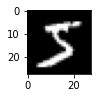

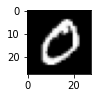

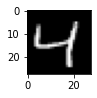

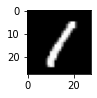

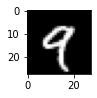

In [ ]:
from matplotlib import pyplot as plt
for i in range(5):  
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
  plt.show()
  ##Redundant

In [ ]:
from sklearn.manifold import TSNE
data_1000 = train_X[0:3000,:]
labels_1000 = train_y[0:3000]
model = TSNE(n_components=2, random_state=0)
##Redundant

In [ ]:
## Bulding a ResNet18

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
def idBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer 
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # sending the res through conv(1,1) before feeding it
    res = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(res)
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the processed res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet34(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model = ResNet34()
##Redundant

In [ ]:
model.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()
train = model.fit(train_X,train_y,batch_size=64, epochs=1)
##Redundant

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 17, 17, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 17, 17, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [ ]:
train.history()

In [ ]:
def ResNet18(shape = (28, 28, 1), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [2, 2, 2, 2]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model2 = ResNet18()
model2.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.summary()
train = model2.fit(train_X,train_y,batch_size=64, epochs=1)

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 34, 34, 1)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 17, 17, 64)   3200        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 17, 17, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

In [ ]:
import matplotlib.pyplot as plt
for i in range(0,len(hist)):
  plt.plot(hist[i]['accuracy'])
  plt.title("model accuracy")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'],loc='upper left')
  plt.show()

In [ ]:
from keras.optimizers import SGD
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model3 = ResNet18()
model3.compile(optimizer = opt, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
model3.summary()
train = model3.fit(train_X,train_y,batch_size=64, epochs=1)

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_20 (Conv2D)             (None, 17, 17, 64)   3200        ['zero_padding2d_1[0][0]']       
                                                                                                  
 batch_normalization_17 (BatchN  (None, 17, 17, 64)  256         ['conv2d_20[0][0]']       

##Redundant code from top till here

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import math
import sys
import random
from datetime import datetime
import os
from imgaug import augmenters as iaa
import seaborn as sns
import torch                                                  
import torchvision
#import os
#import tarfile
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
#from torchvision.datasets.utils import download_url
%matplotlib inline

In [ ]:
trainingData = CIFAR100(root = 'data/', download = True, transform = ToTensor())
testingData = CIFAR100(root = 'data/', train = False, transform = ToTensor())

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting data/cifar-100-python.tar.gz to data/


In [ ]:
classes = trainingData.classes 
print('Number of Classes:', len(classes))
print('Class Names :\n', classes)

Number of Classes: 100
Class Names :
 ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle

Label as Number: 65
Label as Name: rabbit


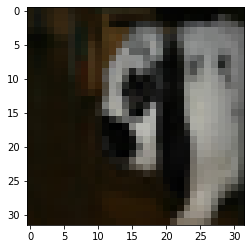

In [ ]:
img, label = trainingData[33]
plt.imshow(img.permute((1,2,0)))
print('Label as Number:', label)
print('Label as Name:', classes[label])

In [ ]:
torch.cuda.is_available()

True

In [ ]:
validationDataLen = 10000
trainDataLen = len(trainingData) - validationDataLen

In [ ]:
trainData, valData = random_split(trainingData,[trainDataLen, validationDataLen])
len(trainData), len(valData)

(40000, 10000)

In [ ]:
batch_size = 64

In [ ]:
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

#### New


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
  
import numpy as np
import matplotlib.pyplot as plt
  
import warnings
warnings.filterwarnings('ignore')

In [ ]:

cifar100 = tf.keras.datasets.cifar100

(train_X, train_y), (test_X, test_y) = cifar100.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))


169001437/169001437 [==============================] - 6s 0us/step
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [ ]:
train_y = tf.one_hot(train_y,
                     depth=train_y.max() + 1,
                     dtype=tf.float64)
test_y = tf.one_hot(test_y,
                   depth=test_y.max() + 1,
                   dtype=tf.float64)
  
train_y = tf.squeeze(train_y)
test_y = tf.squeeze(test_y)

In [ ]:
def idBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer 
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convBlock(x, filter):
    # copy the input to feed it forward
    res = x
    # sending the res through conv(1,1) before feeding it
    res = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(res)
    # First Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Second Layer
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Feed the processed res
    x = tf.keras.layers.Add()([x, res])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet18(shape = (32, 32, 3), classes = 100):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [2, 2, 2, 2]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet18")
    return model

In [ ]:
model = ResNet18()

In [ ]:
hist=[]
results=[]

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_split = 0.2
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5
625/625 [==============================] - 29s 32ms/step - loss: 3.7726 - accuracy: 0.1186 - val_loss: 3.7024 - val_accuracy: 0.1299
Epoch 2/5
625/625 [==============================] - 18s 30ms/step - loss: 3.1538 - accuracy: 0.2207 - val_loss: 3.1637 - val_accuracy: 0.2270
Epoch 3/5
625/625 [==============================] - 17s 27ms/step - loss: 2.8077 - accuracy: 0.2869 - val_loss: 3.3886 - val_accuracy: 0.2137
Epoch 4/5
625/625 [==============================] - 17s 28ms/step - loss: 2.5243 - accuracy: 0.3440 - val_loss: 3.0961 - val_accuracy: 0.2441
Epoch 5/5
79/79 [==============================] - 2s 13ms/step - loss: 2.7469 - accuracy: 0.3231
Epoch 1/10
625/625 [==============================] - 20s 29ms/step - loss: 2.0295 - accuracy: 0.4485 - val_loss: 3.2407 - val_accuracy: 0.2776
Epoch 2/10
625/625 [==============================] - 19s 30ms/step - loss: 1.8053 - accuracy: 0.5008 - val_loss: 3.0517 - val_accuracy: 0.2919
Epoch 3/10
625/625 [======================

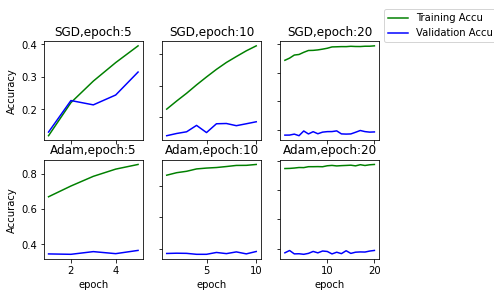

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

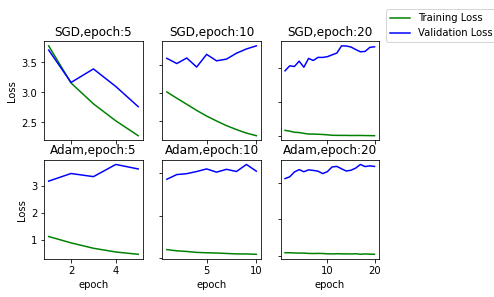

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [ ]:
def ResNet34(shape = (32, 32, 3), classes = 100):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = idBlock(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convBlock(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = idBlock(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
model = ResNet34()

In [ ]:
hist=[]
results=[]

In [ ]:
from keras.optimizers import SGD,Adam

opt_list=[SGD(lr=0.01, momentum=0.9),Adam(lr=0.001)]
epochs_list = [5,10,20]
for optimizer in  opt_list:
  for epoch in epochs_list:

    model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])
    history = model.fit(
      train_X,
      train_y,
      batch_size=64,
      epochs=epoch,
      validation_split = 0.2
    )
    hist.append(history.history)
    results.append(model.evaluate(test_X, test_y, batch_size=128))

Epoch 1/5
625/625 [==============================] - 33s 49ms/step - loss: 3.9870 - accuracy: 0.0826 - val_loss: 3.8688 - val_accuracy: 0.1067
Epoch 2/5
625/625 [==============================] - 29s 47ms/step - loss: 3.4780 - accuracy: 0.1612 - val_loss: 3.6584 - val_accuracy: 0.1425
Epoch 3/5
625/625 [==============================] - 29s 47ms/step - loss: 3.1782 - accuracy: 0.2119 - val_loss: 3.3524 - val_accuracy: 0.1949
Epoch 4/5
625/625 [==============================] - 29s 46ms/step - loss: 2.9235 - accuracy: 0.2600 - val_loss: 4.0121 - val_accuracy: 0.1580
Epoch 5/5
79/79 [==============================] - 1s 19ms/step - loss: 4.2412 - accuracy: 0.1471
Epoch 1/10
625/625 [==============================] - 76s 47ms/step - loss: 2.4825 - accuracy: 0.3484 - val_loss: 3.6479 - val_accuracy: 0.2042
Epoch 2/10
625/625 [==============================] - 30s 48ms/step - loss: 2.2800 - accuracy: 0.3932 - val_loss: 2.8357 - val_accuracy: 0.2989
Epoch 3/10
625/625 [======================

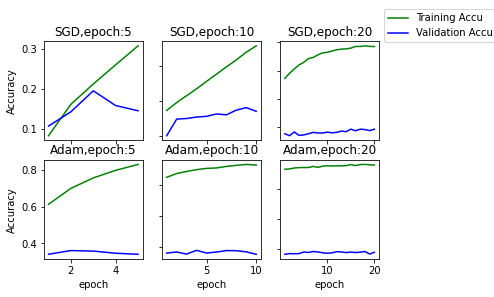

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['accuracy'],color="green",label="Training Accu")
axs[0, 0].plot(epoch1,hist[0]['val_accuracy'],color="blue",label = "Validation Accu")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['accuracy'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_accuracy'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['accuracy'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_accuracy'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['accuracy'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_accuracy'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['accuracy'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_accuracy'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['accuracy'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_accuracy'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Accuracy')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

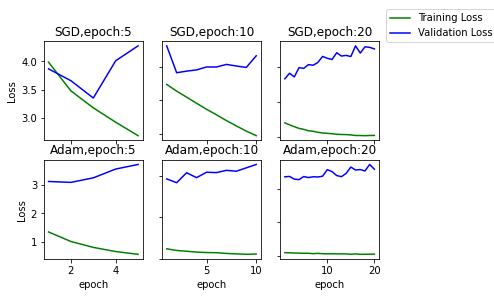

In [ ]:
fig, axs = plt.subplots(2, 3)
epoch1=range(1,6)
epoch2 = range(1,11)
epoch3 = range(1,21)

axs[0, 0].set_title('SGD,epoch:5')
axs[0, 0].plot(epoch1,hist[0]['loss'],color="green",label="Training Loss")
axs[0, 0].plot(epoch1,hist[0]['val_loss'],color="blue",label = "Validation Loss")

axs[0, 1].set_title('SGD,epoch:10')
axs[0, 1].plot(epoch2,hist[1]['loss'],color="green")
axs[0, 1].plot(epoch2,hist[1]['val_loss'],color="blue")

axs[0, 2].set_title('SGD,epoch:20')
axs[0, 2].plot(epoch3,hist[2]['loss'],color="green")
axs[0, 2].plot(epoch3,hist[2]['val_loss'],color="blue")

axs[1, 0].set_title('Adam,epoch:5')
axs[1, 0].plot(epoch1,hist[3]['loss'],color="green")
axs[1, 0].plot(epoch1,hist[3]['val_loss'],color="blue")

axs[1, 1].set_title('Adam,epoch:10')
axs[1, 1].plot(epoch2,hist[4]['loss'],color="green")
axs[1, 1].plot(epoch2,hist[4]['val_loss'],color="blue")

axs[1, 2].set_title('Adam,epoch:20')
axs[1, 2].plot(epoch3,hist[5]['loss'],color="green")
axs[1, 2].plot(epoch3,hist[5]['val_loss'],color="blue")



for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='Loss')
    
fig.legend(bbox_to_anchor=(1.15, 1), borderaxespad=0)
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()